In [53]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [54]:
abalone = pd.read_csv('quizData_SetC (1).csv')
abalone.head()

,Shucked,Viscera,Shell,Weight
0,0.2565,0.1415,0.21,0.6770
1,0.2370,0.1415,0.33,0.7775
2,0.2940,0.1495,0.26,0.7680
3,0.3145,0.1510,0.32,0.8945
4,0.1940,0.1475,0.21,0.6065


In [55]:
abalone.describe()

,Shucked,Viscera,Shell,Weight
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.355179,0.178666,0.236674,0.819623
std,0.221220,0.109560,0.139511,0.489400
min,0.001000,0.000500,0.001500,0.002000
25%,0.180875,0.091000,0.125375,0.433500
50%,0.331750,0.168250,0.229500,0.787750
75%,0.497500,0.250000,0.325000,1.144500
max,1.488000,0.760000,1.005000,2.825500


<AxesSubplot:>

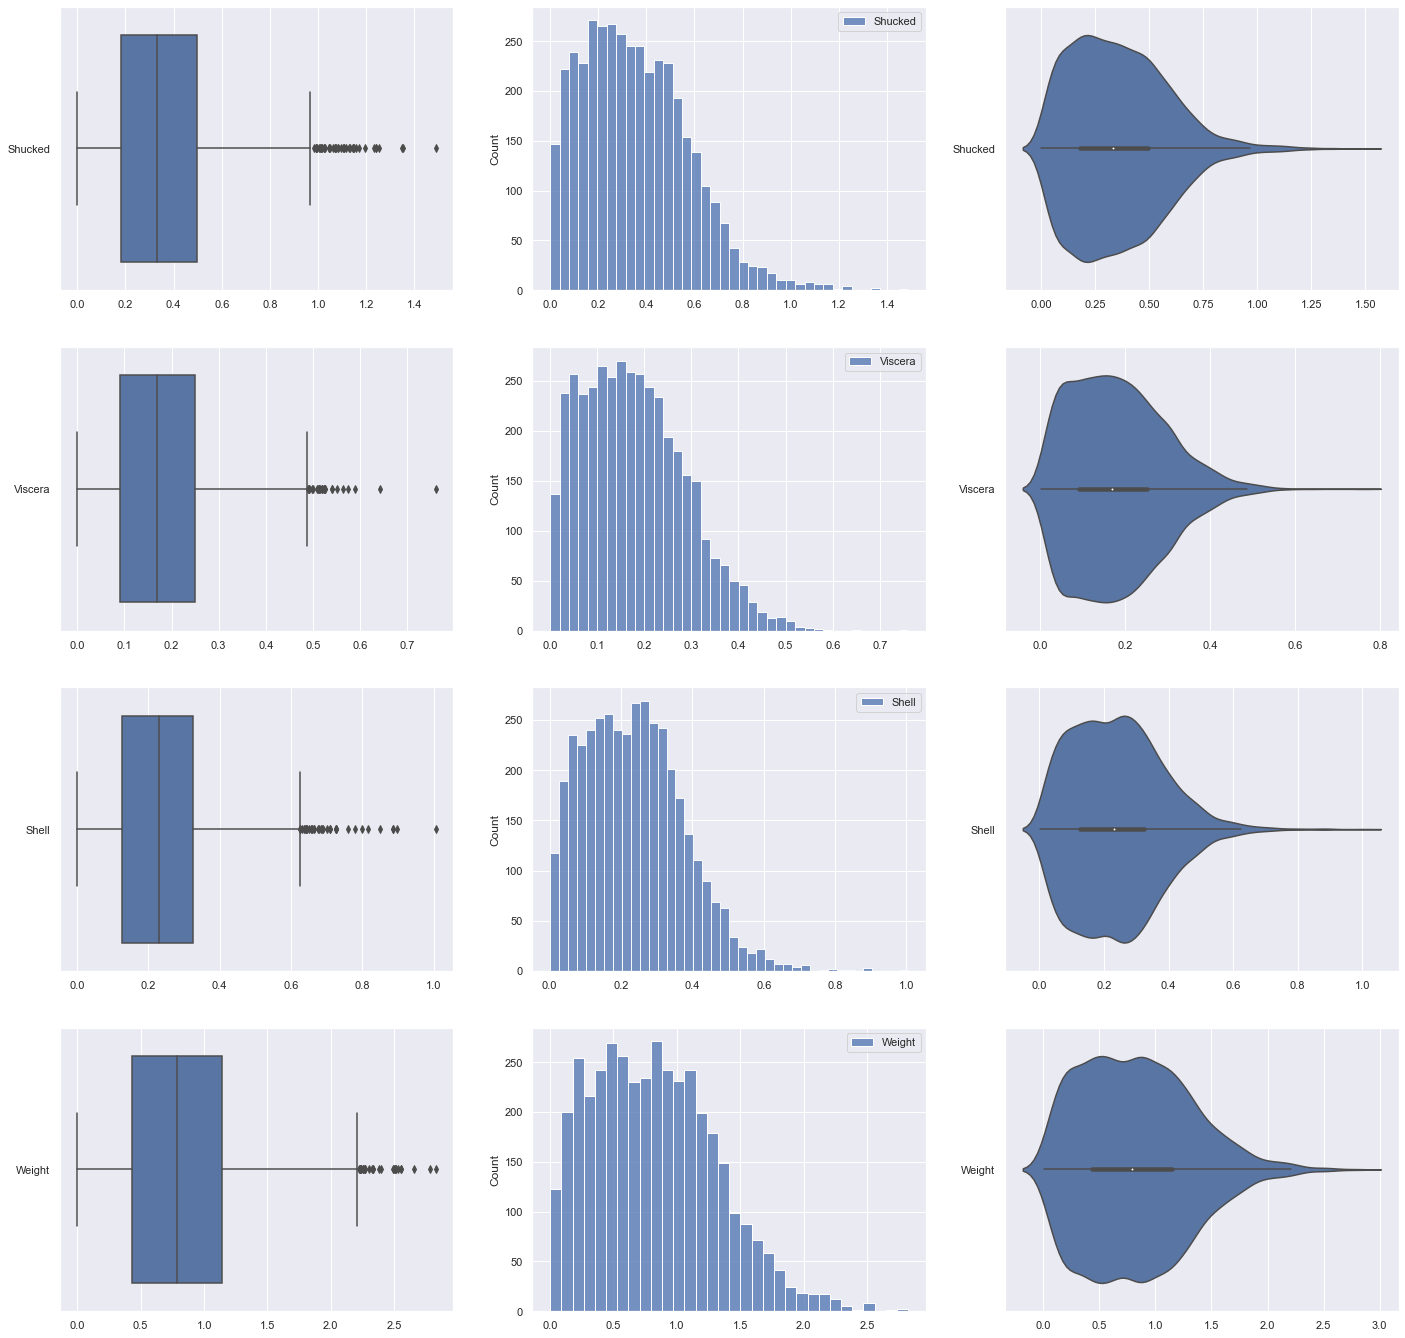

In [56]:
Shucked = pd.DataFrame(abalone['Shucked'])
Viscera = pd.DataFrame(abalone['Viscera'])
Shell = pd.DataFrame(abalone['Shell'])
Weight = pd.DataFrame(abalone['Weight'])


f, axes = plt.subplots(4, 3, figsize=(24, 24))

# Plot the basic uni-variate figures for Shucked
sb.boxplot(data = Shucked, orient = "h", ax = axes[0,0])
sb.histplot(data = Shucked, ax = axes[0,1])
sb.violinplot(data = Shucked, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Viscera
sb.boxplot(data = Viscera, orient = "h", ax = axes[1,0])
sb.histplot(data = Viscera, ax = axes[1,1])
sb.violinplot(data = Viscera, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for Shell
sb.boxplot(data = Shell, orient = "h", ax = axes[2,0])
sb.histplot(data = Shell, ax = axes[2,1])
sb.violinplot(data = Shell, orient = "h", ax = axes[2,2])

# Plot the basic uni-variate figures for Weight
sb.boxplot(data = Weight, orient = "h", ax = axes[3,0])
sb.histplot(data = Weight, ax = axes[3,1])
sb.violinplot(data = Weight, orient = "h", ax = axes[3,2])

"Viscera" has the most normal distribution and "Shucked" has the most outliners 

          Shucked   Viscera     Shell    Weight
Shucked  1.000000  0.932692  0.884262  0.969684
Viscera  0.932692  1.000000  0.908729  0.966682
Shell    0.884262  0.908729  1.000000  0.956745
Weight   0.969684  0.966682  0.956745  1.000000


<AxesSubplot:>

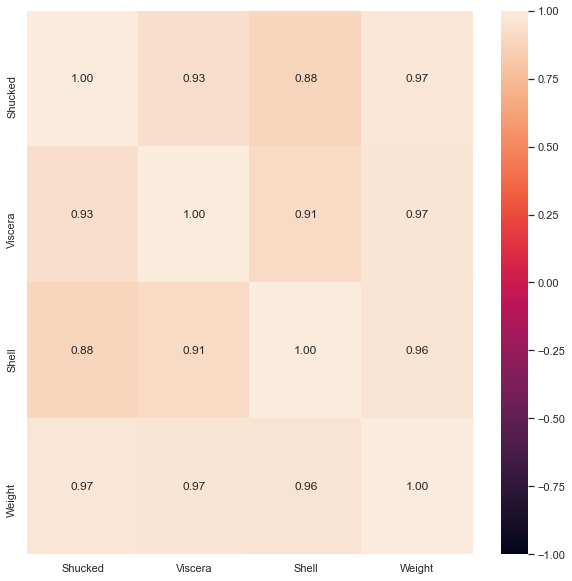

In [57]:
print(abalone.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(abalone.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

"Viscera" and "Shucked" has the highest correlation of 0.97 with "Weight". Yes a high correlation is very helpful in predicting "Weight"

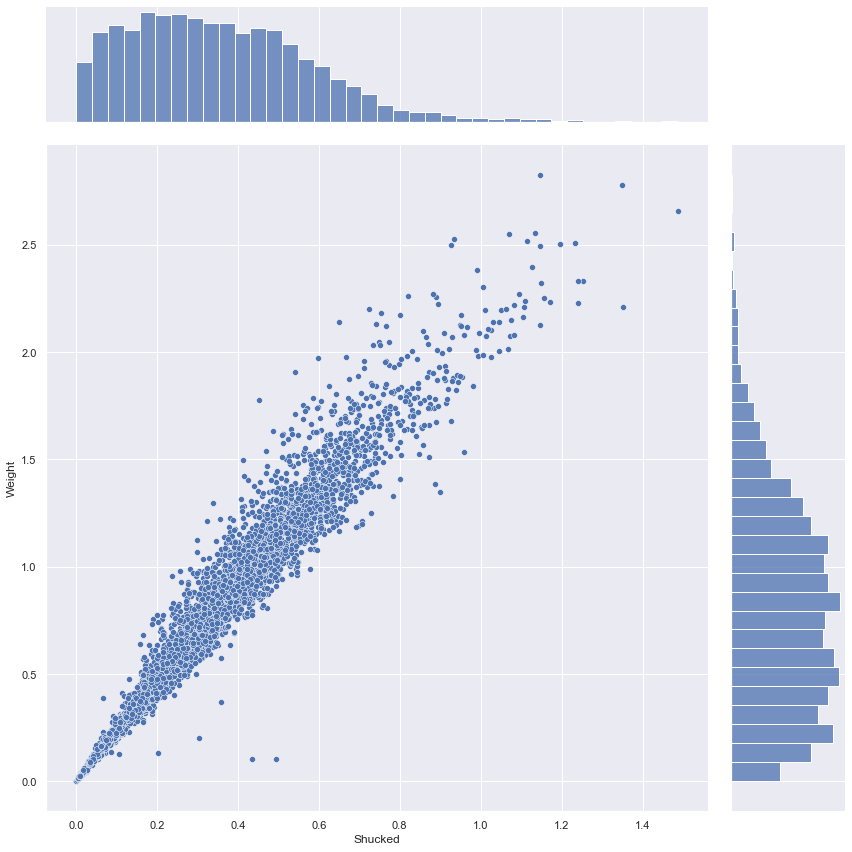

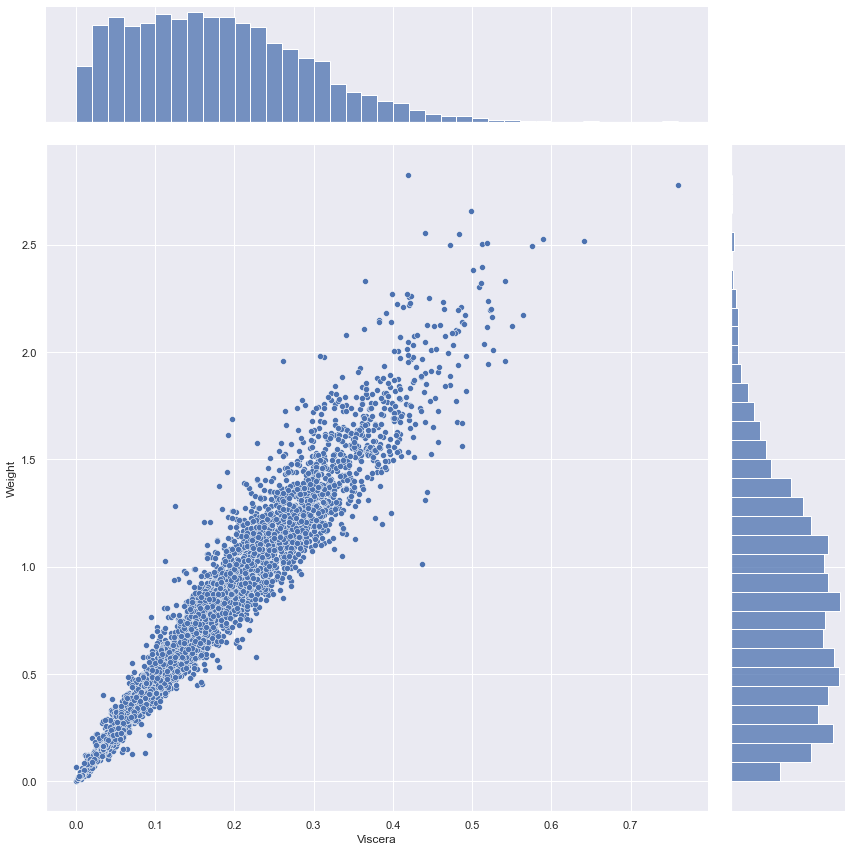

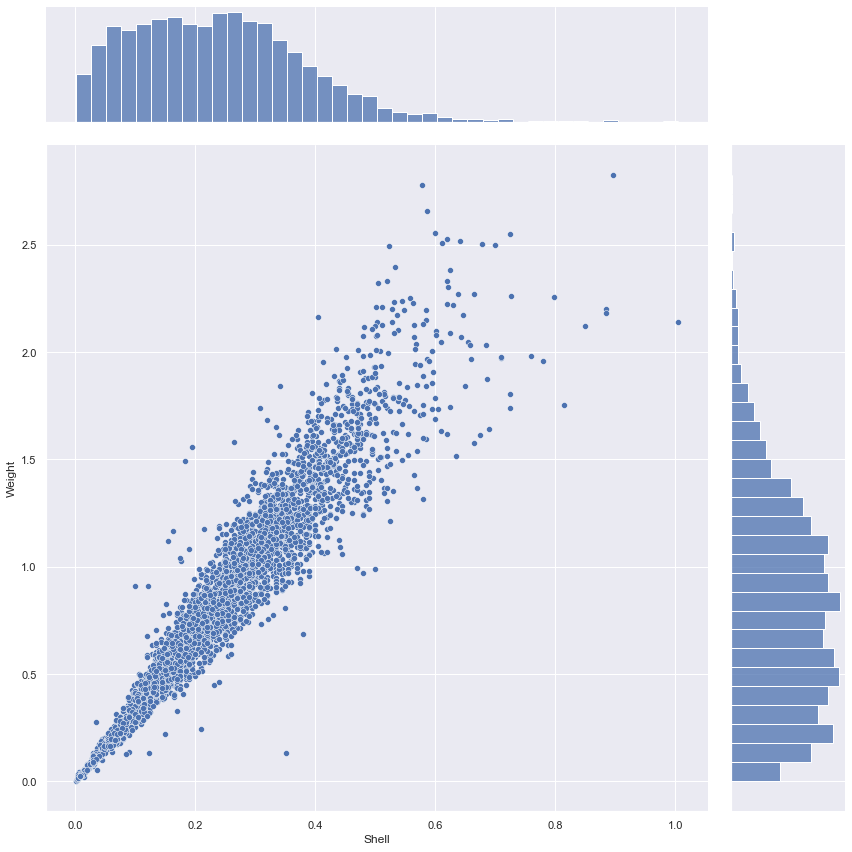

In [58]:
#creating joinplots
joinDF1 = pd.concat([Shucked, Weight], axis = 1).reindex(Shucked.index)
sb.jointplot(data = joinDF1, x = "Shucked", y = "Weight", height = 12)

joinDF2 = pd.concat([Viscera, Weight], axis = 1).reindex(Viscera.index)
sb.jointplot(data = joinDF2, x = "Viscera", y = "Weight", height = 12)

joinDF3 = pd.concat([Shell, Weight], axis = 1).reindex(Shell.index)
sb.jointplot(data = joinDF3, x = "Shell", y = "Weight", height = 12)

"Shucked" looks like it has the strongest relation with weight as the points are more scattered together and linear

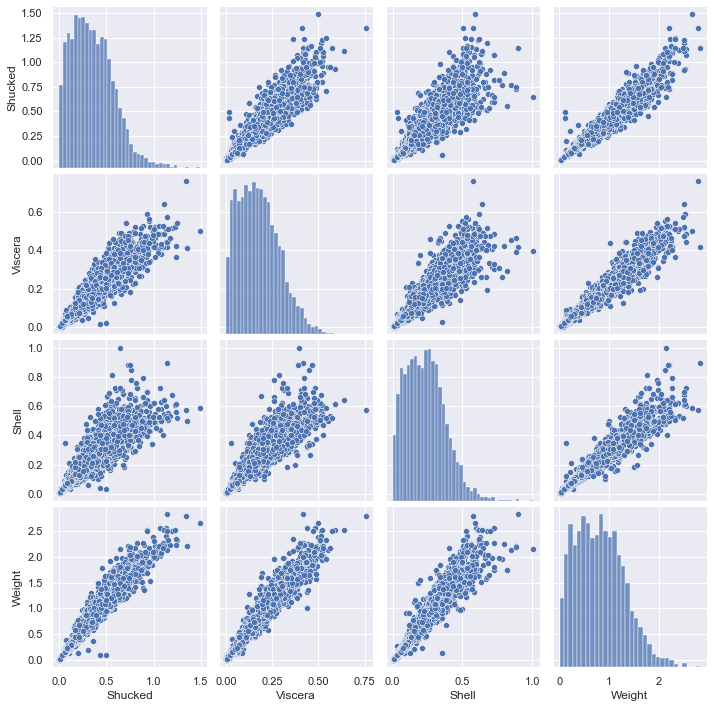

In [59]:
#creating overall pairplot
sb.pairplot(abalone)

From pairplot, we can confirm that "Shucked" has the strongest linear relation with "Weight" hence is the most useful in preidcting "Weight" 

Question 2

In [60]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Intercept of regression 	 b =  [0.05957469]
Coefficient of regression 	 a =  [[2.13887932]]


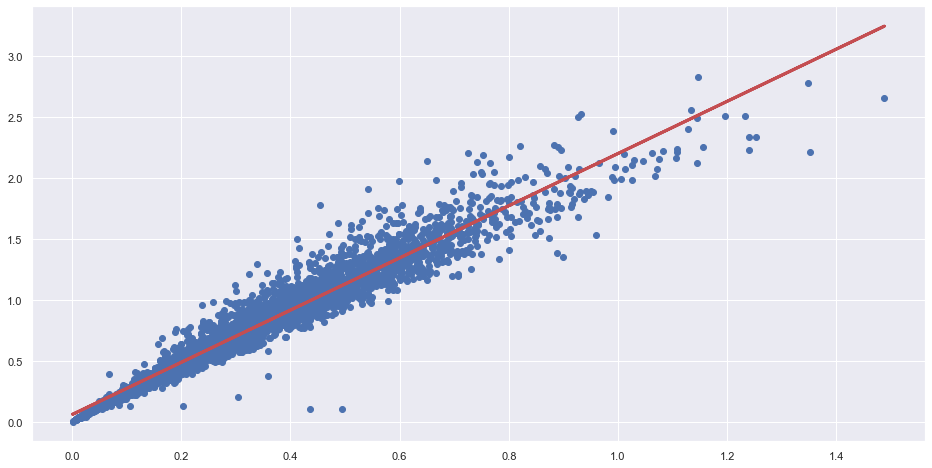

In [61]:
#Split Response and Predictors 
Shucked_train, Shucked_test, Weight_train, Weight_test = train_test_split(Shucked, Weight, test_size = 0.2)


#linereg object 
linreg = LinearRegression()
linreg.fit(Shucked_train, Weight_train)

#coeff of linear regression line 
print("Intercept of regression \t b = ", linreg.intercept_)
print("Coefficient of regression \t a = ", linreg.coef_)

#formula for the line regression 
regline_x = Shucked_train
regline_y = linreg.coef_ * Shucked_train + linreg.intercept_

#plot regression line 
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(Shucked_train, Weight_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

Intercept of regression 	 b =  [0.05902764]
Coefficient of regression 	 a =  [[2.14021868]]


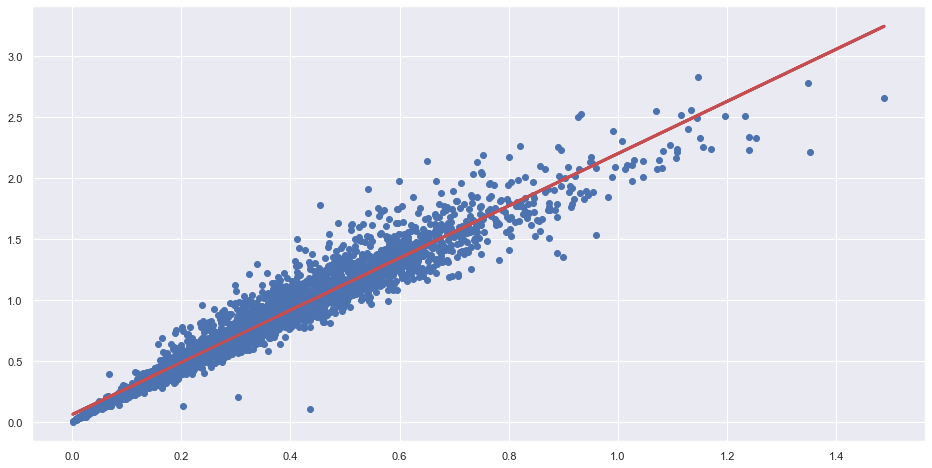

In [62]:
#Split Response and Predictors 
Viscera_train, Viscera_test, Weight_train, Weight_test = train_test_split(Shucked, Weight, test_size = 0.2)


#linereg object 
linreg = LinearRegression()
linreg.fit(Viscera_train, Weight_train)

#coeff of linear regression line 
print("Intercept of regression \t b = ", linreg.intercept_)
print("Coefficient of regression \t a = ", linreg.coef_)

#formula for the line regression 
regline_x = Viscera_train
regline_y = linreg.coef_ * Viscera_train + linreg.intercept_

#plot regression line 
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(Viscera_train, Weight_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

Intercept of regression 	 b =  [0.02231502]
Coefficient of regression 	 a =  [[3.37495276]]


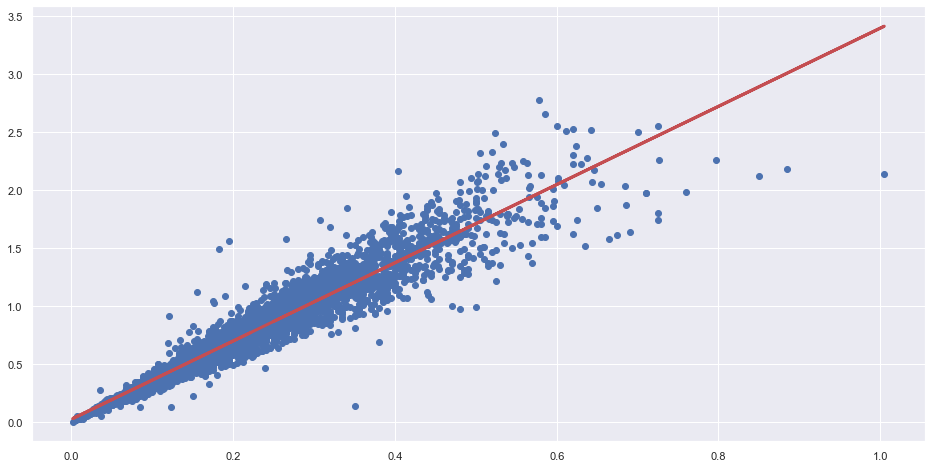

In [63]:
#Split Response and Predictors 
Shell_train, Shell_test, Weight_train, Weight_test = train_test_split(Shell, Weight, test_size = 0.2)


#linereg object 
linreg = LinearRegression()
linreg.fit(Shell_train, Weight_train)

#coeff of linear regression line 
print("Intercept of regression \t b = ", linreg.intercept_)
print("Coefficient of regression \t a = ", linreg.coef_)

#formula for the line regression 
regline_x = Shell_train
regline_y = linreg.coef_ * Shell_train + linreg.intercept_

#plot regression line 
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(Shell_train, Weight_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

Goodness of Fit of Model of Shucked 	Train Dataset
Explained Variance (R^2) 	: 0.9399056852927544
Mean Squared Error (MSE) 	: 0.014466115441263765

Goodness of Fit of Model of Viscera 	Train Dataset
Explained Variance (R^2) 	: 0.9354977603650356
Mean Squared Error (MSE) 	: 0.015474052930598208

Goodness of Fit of Model of Shell 	Train Dataset
Explained Variance (R^2) 	: 0.9173906781565521
Mean Squared Error (MSE) 	: 0.020276309619770574

Goodness of Fit of Model of Shucked 	Test Dataset
Explained Variance (R^2) 	: 0.9417969843751975
Mean Squared Error (MSE) 	: 0.013635798544569755

Goodness of Fit of Model of Viscera 	Test Dataset
Explained Variance (R^2) 	: -0.8767218310683942
Mean Squared Error (MSE) 	: 0.4396782630235333

Goodness of Fit of Model of Shell 	Test Dataset
Explained Variance (R^2) 	: -0.976484359626905
Mean Squared Error (MSE) 	: 0.46305062143344794



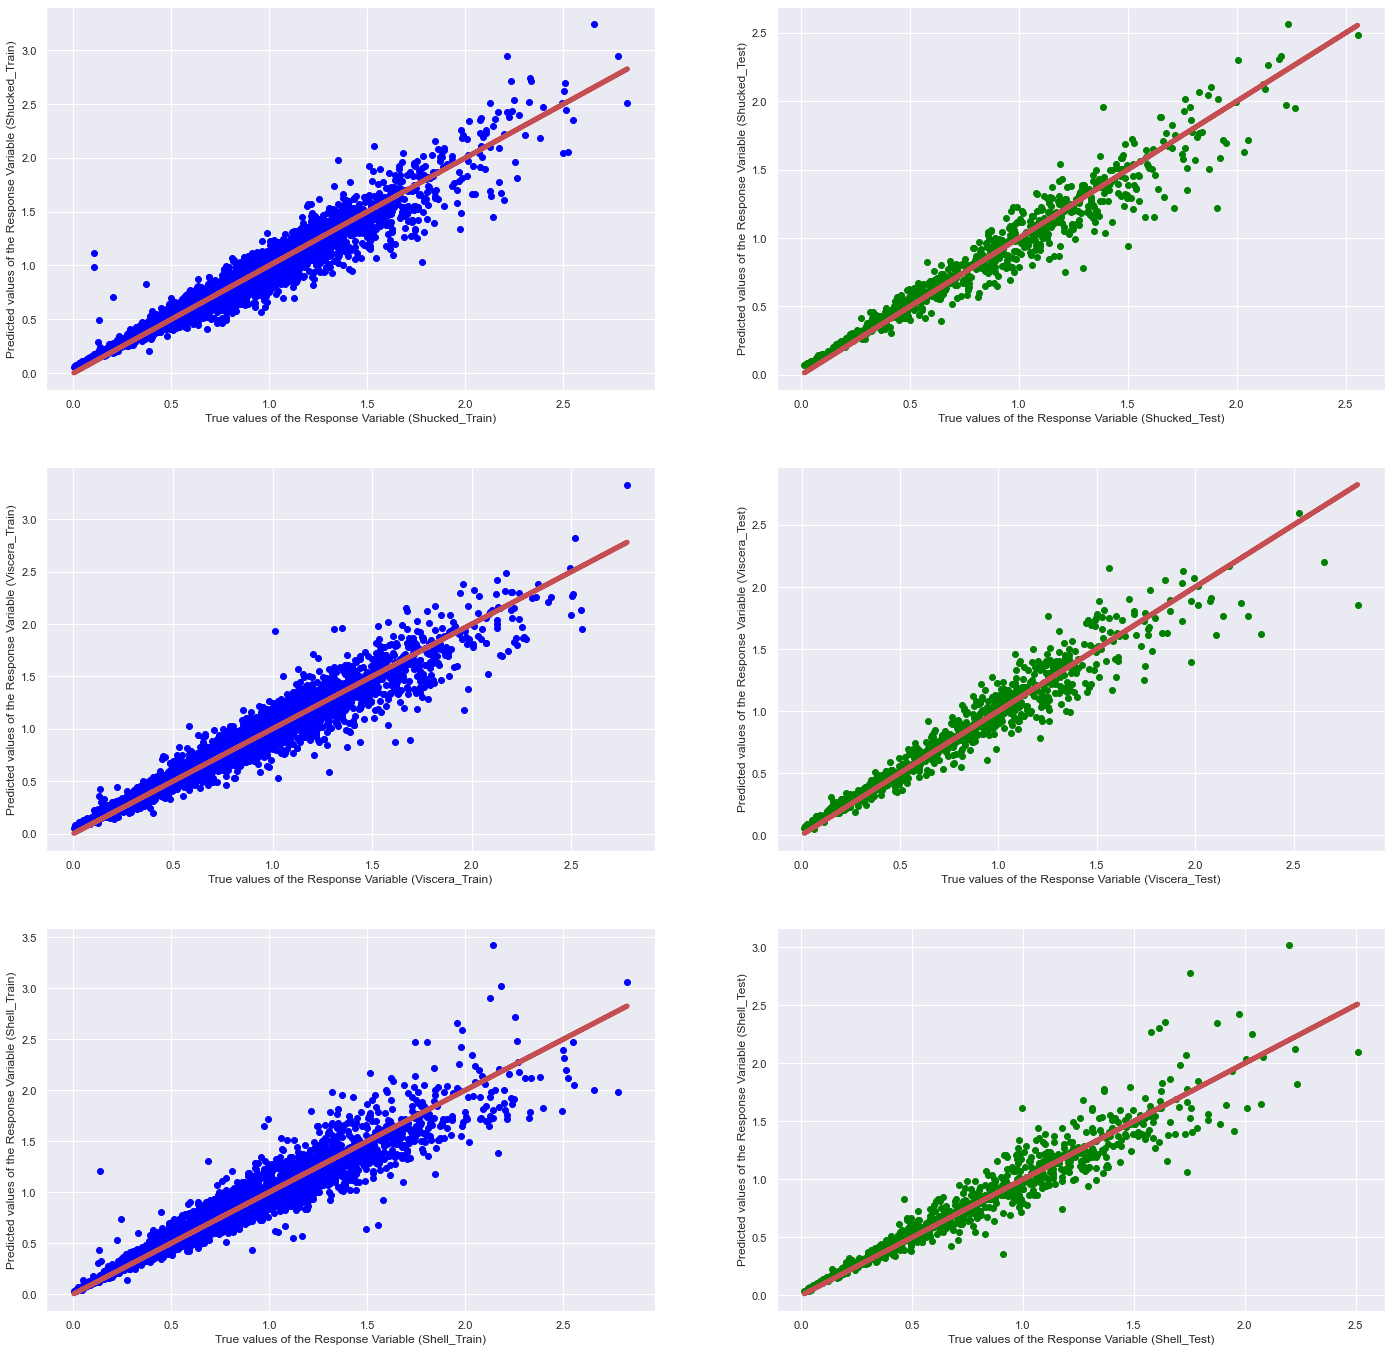

In [64]:
#split the dataset 
Shucked_train, Shucked_test, Weight_train1, Weight_test1 = train_test_split(Shucked, Weight, test_size = 0.2)
Viscera_train, Viscera_test, Weight_train2, Weight_test2 = train_test_split(Viscera, Weight, test_size = 0.2)
Shell_train, Shell_test, Weight_train3, Weight_test3 = train_test_split(Shell, Weight, test_size = 0.2)

linreg1 = LinearRegression()         
linreg1.fit(Shucked_train, Weight_train1)
linreg2 = LinearRegression()         
linreg2.fit(Viscera_train, Weight_train2) 
linreg3 = LinearRegression()         
linreg3.fit(Shell_train, Weight_train3) 

# Predict the Total values from Predictors
Weight_train_pred1 = linreg1.predict(Shucked_train)
Weight_test_pred1 = linreg1.predict(Shucked_test)
Weight_train_pred2 = linreg2.predict(Viscera_train)
Weight_test_pred2 = linreg2.predict(Viscera_test)
Weight_train_pred3 = linreg3.predict(Shell_train)
Weight_test_pred3 = linreg3.predict(Shell_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model of Shucked \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(Shucked_train, Weight_train1))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Weight_train1, Weight_train_pred1))
print()
print("Goodness of Fit of Model of Viscera \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(Viscera_train, Weight_train2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Weight_train2, Weight_train_pred2))
print()
print("Goodness of Fit of Model of Shell \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg3.score(Shell_train, Weight_train3))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Weight_train3, Weight_train_pred3))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model of Shucked \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(Shucked_test, Weight_test1))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Weight_test1, Weight_test_pred1))
print()
print("Goodness of Fit of Model of Viscera \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(Viscera_test, Weight_test1))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Weight_test1, Weight_test_pred2))
print()
print("Goodness of Fit of Model of Shell \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg3.score(Shell_test, Weight_test1))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Weight_test1, Weight_test_pred3))
print()


# Plot the Predictions vs the True values
f, axes = plt.subplots(3, 2, figsize=(24, 24))
axes[0,0].scatter(Weight_train1, Weight_train_pred1, color = "blue")
axes[0,0].plot(Weight_train1, Weight_train1, 'r-', linewidth = 5)
axes[0,0].set_xlabel("True values of the Response Variable (Shucked_Train)")
axes[0,0].set_ylabel("Predicted values of the Response Variable (Shucked_Train)")
axes[0,1].scatter(Weight_test1, Weight_test_pred1, color = "green")
axes[0,1].plot(Weight_test1, Weight_test1, 'r-', linewidth = 5)
axes[0,1].set_xlabel("True values of the Response Variable (Shucked_Test)")
axes[0,1].set_ylabel("Predicted values of the Response Variable (Shucked_Test)")
axes[1,0].scatter(Weight_train2, Weight_train_pred2, color = "blue")
axes[1,0].plot(Weight_train2, Weight_train2, 'r-', linewidth = 5)
axes[1,0].set_xlabel("True values of the Response Variable (Viscera_Train)")
axes[1,0].set_ylabel("Predicted values of the Response Variable (Viscera_Train)")
axes[1,1].scatter(Weight_test2, Weight_test_pred2, color = "green")
axes[1,1].plot(Weight_test2, Weight_test2, 'r-', linewidth = 5)
axes[1,1].set_xlabel("True values of the Response Variable (Viscera_Test)")
axes[1,1].set_ylabel("Predicted values of the Response Variable (Viscera_Test)")
axes[2,0].scatter(Weight_train3, Weight_train_pred3, color = "blue")
axes[2,0].plot(Weight_train3, Weight_train3, 'r-', linewidth = 5)
axes[2,0].set_xlabel("True values of the Response Variable (Shell_Train)")
axes[2,0].set_ylabel("Predicted values of the Response Variable (Shell_Train)")
axes[2,1].scatter(Weight_test3, Weight_test_pred3, color = "green")
axes[2,1].plot(Weight_test3, Weight_test3, 'r-', linewidth = 5)
axes[2,1].set_xlabel("True values of the Response Variable (Shell_Test)")
axes[2,1].set_ylabel("Predicted values of the Response Variable (Shell_Test)")
plt.show()

"Shucked" is the best in terms of predicting weight. The line regression line best suits the scatterplot of train and test data set 

Question 3

Intercept of regression 	 b =  [-0.00747169]
Coefficient of regression 	 a =  [[0.93318472 1.07433463 1.28223402]]

  Predictors  Coefficients
0    Shucked      0.933185
1    Viscera      1.074335
2      Shell      1.282234



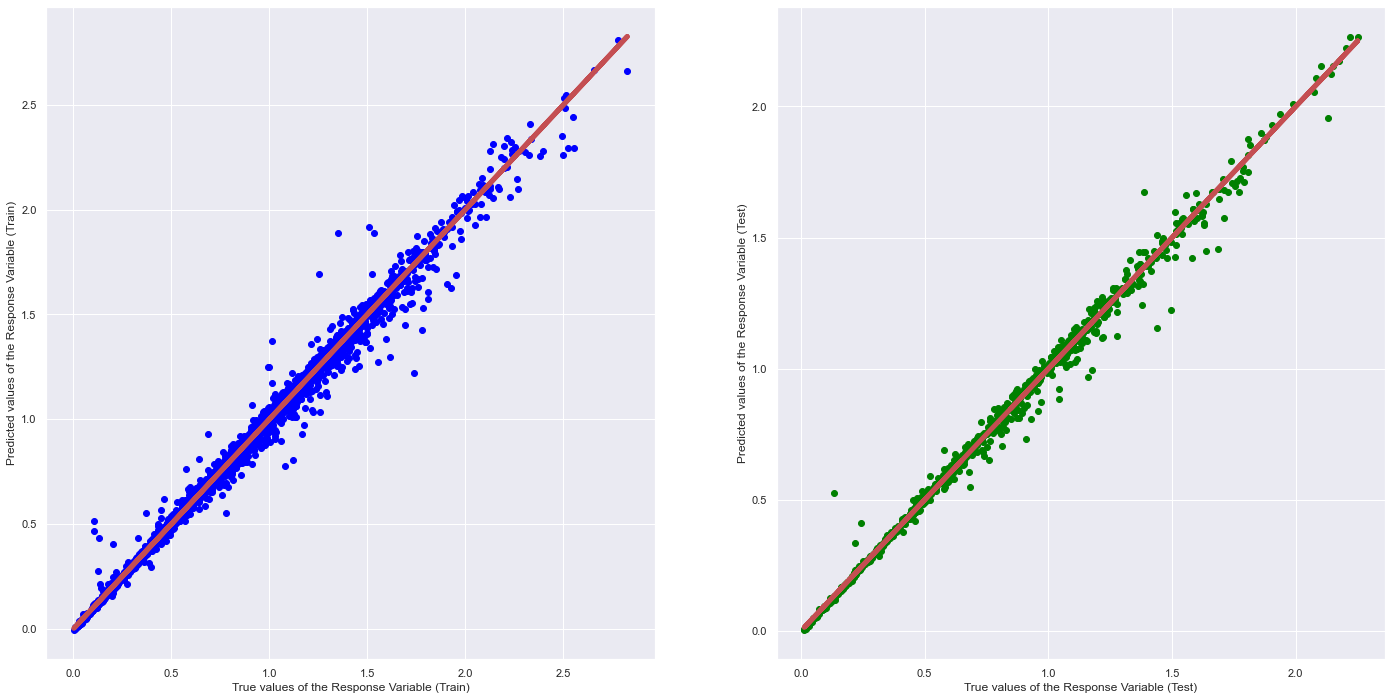

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9911347785640106
Mean Squared Error (MSE) 	: 0.0021486355425776238

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9924885197348504
Mean Squared Error (MSE) 	: 0.0017087558655384033



In [65]:
y = pd.DataFrame(abalone["Weight"])
x = pd.DataFrame(abalone[["Shucked", "Viscera", "Shell"]])

#split the dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#linear regression 
linreg = LinearRegression()
linreg.fit(x_train, y_train)

#intercept and coeff of linear regression line 
print("Intercept of regression \t b = ", linreg.intercept_)
print("Coefficient of regression \t a = ", linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

To improve on the linear model 
1) Increae the number of data points, by increasing the number of datapoints we can have a more accurate representation of linear model 

2) Increase the percentage of Test data set. Instead of usng 80% for train ans 20% for test, we can use 90% train and 10% test. This will cause the MSE to decrease and hence will make the linear regression more accurate 